In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [3]:
digits = datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [4]:
# data is made of 8x8 images of digits,
# images are stored in the `images` attribute of the dataset. 
# For these images,which digit they represent is given in the 'target' of the dataset.
images_and_labels = list(zip(digits.images, digits.target))
images_and_labels[0:3]

[(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
         [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
         [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
         [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
         [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
         [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
         [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
         [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0),
 (array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
         [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
         [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]), 1),
 (array([[  0.,   0.,   0.,   4.,  15.,  12.

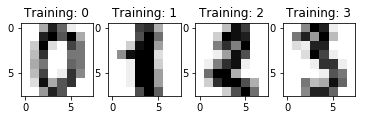

In [7]:
for index, (image, label) in enumerate(images_and_labels[:4]): #take first four images from the dataset
    plt.subplot(2, 4, index+1) #to plot the four images as seperate graphs
    #plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest') #convert the plots into gray scale
    plt.title('Training: %i' % label)
plt.show()

In [16]:
# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
print("length of images= ",n_samples)
data = digits.images.reshape((n_samples, -1))
print(data.shape),data[0:3]

length of images=  1797
(1797, 64)


(None,
 array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
          15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
           8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
           5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
           1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
           0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
          11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
           0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
           0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
          16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
           0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
        [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
          16.,  15.,  14.,   0.,   0.,  

In [17]:
classifier = svm.SVC(gamma=0.001)
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
#predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])
print("expected= ",expected)
print("predicted= ",predicted)

expected=  [8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 4 3

In [19]:
'''#display the results using a confusion matrix
# '%' is used to display the data in the form of a table
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))'''

'#display the results using a confusion matrix\n# \'%\' is used to display the data in the form of a table\nprint("Classification report for classifier %s:\n%s\n"\n      % (classifier, metrics.classification_report(expected, predicted)))\nprint("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))'

In [20]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
images_and_predictions

[(array([[  0.,   0.,   1.,  11.,  14.,  15.,   3.,   0.],
         [  0.,   1.,  13.,  16.,  12.,  16.,   8.,   0.],
         [  0.,   8.,  16.,   4.,   6.,  16.,   5.,   0.],
         [  0.,   5.,  15.,  11.,  13.,  14.,   0.,   0.],
         [  0.,   0.,   2.,  12.,  16.,  13.,   0.,   0.],
         [  0.,   0.,   0.,  13.,  16.,  16.,   6.,   0.],
         [  0.,   0.,   0.,  16.,  16.,  16.,   7.,   0.],
         [  0.,   0.,   0.,  11.,  13.,  12.,   1.,   0.]]), 8),
 (array([[  0.,   0.,   6.,  14.,  16.,   5.,   0.,   0.],
         [  0.,   2.,  16.,  16.,  16.,   7.,   0.,   0.],
         [  0.,   2.,  15.,  16.,  15.,   2.,   0.,   0.],
         [  0.,   0.,   6.,  16.,  15.,   7.,   0.,   0.],
         [  0.,   0.,  14.,  10.,   6.,  16.,   3.,   0.],
         [  0.,   1.,  16.,   3.,   0.,  16.,   7.,   0.],
         [  0.,   0.,  10.,  11.,  11.,  15.,   3.,   0.],
         [  0.,   0.,   3.,  14.,  16.,   6.,   0.,   0.]]), 8),
 (array([[  0.,   0.,   0.,   4.,  15.,   6.

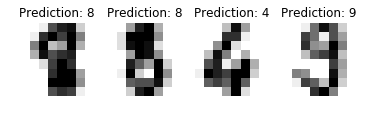

In [21]:
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index+5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()